## Step 1 - Importing Data Set

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/cameronpaschall/Desktop/Instacart Basket Analysis'

In [3]:
# Import data set

df_opc = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_cust.pkl'))

In [137]:
# Task 4.10 

# Instacart Basket Analysis 

## Cameron Paschall 

#### Table of Contents 

1. Data import
2. Addressing PII data
3. Regional analysis 
4. Excluding low-activity customers
5. Customer profiling and deriving new columns 
6. Visualizations 
7. Comparing customer profiles with regions and departments  
8. Aggregating variables on a customer-profile level 
9. Exporting DF

SyntaxError: invalid syntax (<ipython-input-137-44d9e88e7528>, line 9)

## Step 2 - Adressing any PII data

In [4]:
# column names for PII check
df_opc.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'Busiest days',
       'Slowest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spending', 'type_of_spender', 'order_freq', 'frequency_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'merge'],
      dtype='object')

In [5]:
df_opc.head()

order_id  user_id  order_number  orders_day_of_week  order_time_of_day  \
0   2539329        1             1                   2                  8   
1   2539329        1             1                   2                  8   
2   2539329        1             1                   2                  8   
3   2539329        1             1                   2                  8   
4   2539329        1             1                   2                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                    1.11         196                  1          0   
1                    1.11       14084                  2          0   
2                    1.11       12427                  3          0   
3                    1.11       26088                  4          0   
4                    1.11       26405                  5          0   

                              product_name  ...  first_name  last_name  \
0                                     Soda  ...       Linda     Nguyen   
1  Organic Unsweetened Vanilla Almond Milk  ...       Linda     Nguyen   
2                      Original Beef Jerky  ...       Linda     Nguyen   
3               Aged White Cheddar Popcorn  ...       Linda     Nguyen   
4         XL Pick-A-Size Paper Towel Rolls  ...       Linda     Nguyen   

   gender    state age date_joined n_dependants fam_status  income merge  
0  Female  Alabama  31   2/17/2019            3    married   40423  both  
1  Female  Alabama  31   2/17/2019            3    married   40423  both  
2  Female  Alabama  31   2/17/2019            3    married   40423  both  
3  Female  Alabama  31   2/17/2019            3    married   40423  both  
4  Female  Alabama  31   2/17/2019            3    married   40423  both  

[5 rows x 34 columns]

In [6]:
# deleting unnecessary column
del df_opc['merge']

In [7]:
df_opc.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'Busiest days',
       'Slowest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spending', 'type_of_spender', 'order_freq', 'frequency_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income'],
      dtype='object')

In [8]:
# creating new DF without PII data (first and last names)

df_final = df_opc.drop(['first_name', 'last_name'], axis = 1)

## Step 3 - Regional Analysis

In [9]:
# create regions 1-4

region_1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

region_2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

region_3 = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

region_4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [10]:
# loop 

result = []

for value in df_final['state']:
    if value in region_1:
        result.append('northeast')
    elif value in region_2:
        result.append('midwest')
    elif value in region_3:
        result.append('south')
    elif value in region_4:
        result.append('west')
    else:
        result.append('n/a')

In [11]:
# create new column (region)
df_final['region'] = result

In [12]:
# checking new column
df_final.head(2)

order_id  user_id  order_number  orders_day_of_week  order_time_of_day  \
0   2539329        1             1                   2                  8   
1   2539329        1             1                   2                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                    1.11         196                  1          0   
1                    1.11       14084                  2          0   

                              product_name  ...  order_freq    frequency_flag  \
0                                     Soda  ...        20.0  Regular Customer   
1  Organic Unsweetened Vanilla Almond Milk  ...        20.0  Regular Customer   

   gender    state age date_joined n_dependants fam_status  income region  
0  Female  Alabama  31   2/17/2019            3    married   40423  south  
1  Female  Alabama  31   2/17/2019            3    married   40423  south  

[2 rows x 32 columns]

In [13]:
df_final['region'].value_counts()

south        10801982
west          8300617
midwest       7604016
northeast     5728444
Name: region, dtype: int64

### 3b - Finding difference in regional spending

In [14]:
crosstab = pd.crosstab(df_final['region'], df_final['type_of_spender'], dropna = False)

In [15]:
# pasted results into excel and performed calculations to get regional spending with respective percentages of high and low spenders

crosstab.to_clipboard()

In [16]:
region_spend = {'region': ['midwest', 'northeast', 'south', 'west'], '% high_spenders': [2.05, 1.89, 1.94, 1.93], '% low_spenders': [97.95, 98.11, 98.06, 98.07]}

In [17]:
# creat df for regional spending

df_reg_spend = pd.DataFrame(data = region_spend)

In [18]:
# check created dataframe

df_reg_spend.head()

region  % high_spenders  % low_spenders
0    midwest             2.05           97.95
1  northeast             1.89           98.11
2      south             1.94           98.06
3       west             1.93           98.07

In [19]:
# virtually no difference in region regarding types of spenders.

## Step 4 - exclusion flag for low-activity customers

In [20]:
df_final.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'Busiest days',
       'Slowest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spending', 'type_of_spender', 'order_freq', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       'region'],
      dtype='object')

In [21]:
df_final['frequency_flag'].value_counts()

Frequent Customer        22815145
Regular Customer          6929908
Non-frequent Customer     2690006
Name: frequency_flag, dtype: int64

In [22]:
df_final.loc[df_final['max_order'] < 5, 'exclusion_flag'] = 'low_activity_customer'
df_final.loc[df_final['max_order'] >= 5, 'exclusion_flag'] = 'regular_customer'

In [23]:
df_final['exclusion_flag'].value_counts()

regular_customer         30993489
low_activity_customer     1441570
Name: exclusion_flag, dtype: int64

In [24]:
# create a subset

df_low_act_cust = df_final[df_final['exclusion_flag'] == 'low_activity_customer']

In [25]:
df_low_act_cust['max_order'].value_counts()

4    754267
3    687303
Name: max_order, dtype: int64

In [26]:
# export low activity customers df

df_low_act_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

In [27]:
# adjust final dataframe to exclude low activity customers

df_final_2 = df_final[df_final['exclusion_flag'] == 'regular_customer']

In [28]:
# df exclusion flag check

df_final_2['exclusion_flag'].value_counts() 

regular_customer    30993489
Name: exclusion_flag, dtype: int64

In [29]:
# export regular customer only dataframe

df_final_2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'regular_customers_only.pkl'))

## Step 5 - Profiling Variables

In [30]:
# find breakdown of ages

df_final_2['age'].value_counts()

79    508850
49    508265
48    507278
31    506638
64    505241
       ...  
60    462341
36    461087
66    455153
41    451683
25    449845
Name: age, Length: 64, dtype: int64

In [31]:
# create different age groups

age_range = []

for value in df_final_2['age']:
    if value <= 25:
        age_range.append('18-25')
    elif (value > 25) and (value <= 35):
        age_range.append('26-35')
    elif (value > 35) and (value <= 45):
        age_range.append('36-45')
    elif (value > 45) and (value <= 55):
        age_range.append('46-55')
    elif (value > 55) and (value <= 65):
        age_range.append('56-65')
    elif (value > 65) and (value <= 75):
        age_range.append('66-75')
    elif (value > 75) and (value <= 85):
        age_range.append('76-85')
    elif (value > 85) and (value <= 95):
        age_range.append('85+')    
    else:
        result.append('n/a')

In [32]:
# create age_range column

df_final_2['age_range'] = age_range

<ipython-input-32-cb290ba5974e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_2['age_range'] = age_range


In [33]:
# check value counts of each age range

df_final_2['age_range'].value_counts().sort_index()

18-25    3868278
26-35    4878742
36-45    4832601
46-55    4894004
56-65    4782088
66-75    4821694
76-85    2916082
Name: age_range, dtype: int64

### correlation btwn parental status and department

In [34]:
# check value counts of n_dependants

df_final_2['n_dependants'].value_counts().sort_index()

0    7747183
1    7726129
2    7740539
3    7779638
Name: n_dependants, dtype: int64

In [35]:
df_final_2['fam_status'].value_counts().sort_index()

divorced/widowed                     2647799
living with parents and siblings     1482721
married                             21763585
single                               5099384
Name: fam_status, dtype: int64

In [36]:
# creating parental_status column

df_final_2.loc[df_final_2['n_dependants'] == 0, 'parental_status'] = 'no children'
df_final_2.loc[df_final_2['n_dependants'] >= 1, 'parental_status'] = 'children'

/Users/cameronpaschall/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/cameronpaschall/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/cameronpaschall/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be se

In [37]:
df_final_2['parental_status'].value_counts(dropna = False)

children       23246306
no children     7747183
Name: parental_status, dtype: int64

### correlation btwn age range and type of spender

In [38]:
# create crosstab between type of spender and age group

cross_age_spend = pd.crosstab(df_final_2['age_range'], df_final_2['type_of_spender'], dropna = False)

In [39]:
cross_age_spend

type_of_spender  High Spender  Low Spender
age_range                                 
18-25                   74047      3794231
26-35                   88091      4790651
36-45                   99571      4733030
46-55                  100043      4793961
56-65                   95764      4686324
66-75                   85627      4736067
76-85                   60686      2855396

### correlation btwn department and age range

In [40]:
# create department column rather than looking at department_id

df_final_2.loc[df_final_2['department_id'] == 1, 'department'] = 'frozen'
df_final_2.loc[df_final_2['department_id'] == 2, 'department'] = 'other'
df_final_2.loc[df_final_2['department_id'] == 3, 'department'] = 'bakery'
df_final_2.loc[df_final_2['department_id'] == 4, 'department'] = 'produce'
df_final_2.loc[df_final_2['department_id'] == 5, 'department'] = 'alcohol'
df_final_2.loc[df_final_2['department_id'] == 6, 'department'] = 'international'
df_final_2.loc[df_final_2['department_id'] == 7, 'department'] = 'beverages'
df_final_2.loc[df_final_2['department_id'] == 8, 'department'] = 'pets'
df_final_2.loc[df_final_2['department_id'] == 9, 'department'] = 'dry goods pasta'
df_final_2.loc[df_final_2['department_id'] == 10, 'department'] = 'bulk'
df_final_2.loc[df_final_2['department_id'] == 11, 'department'] = 'personal care'
df_final_2.loc[df_final_2['department_id'] == 12, 'department'] = 'meat seafood'
df_final_2.loc[df_final_2['department_id'] == 13, 'department'] = 'pantry'
df_final_2.loc[df_final_2['department_id'] == 14, 'department'] = 'breakfast'
df_final_2.loc[df_final_2['department_id'] == 15, 'department'] = 'canned goods'
df_final_2.loc[df_final_2['department_id'] == 16, 'department'] = 'dairy eggs'
df_final_2.loc[df_final_2['department_id'] == 17, 'department'] = 'households'
df_final_2.loc[df_final_2['department_id'] == 18, 'department'] = 'babies'
df_final_2.loc[df_final_2['department_id'] == 19, 'department'] = 'snacks'
df_final_2.loc[df_final_2['department_id'] == 20, 'department'] = 'deli'
df_final_2.loc[df_final_2['department_id'] == 21, 'department'] = 'missing'

/Users/cameronpaschall/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/cameronpaschall/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/cameronpaschall/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be se

/Users/cameronpaschall/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/cameronpaschall/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [41]:
df_final_2['department'].value_counts()

produce            9079276
dairy eggs         5177183
snacks             2766406
beverages          2571901
frozen             2121732
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
households          699858
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [42]:
cross_age_dep = pd.crosstab(df_final_2['age_range'], df_final_2['department'], dropna = False)

In [43]:
cross_age_dep.T

age_range          18-25    26-35    36-45    46-55    56-65    66-75   76-85
department                                                                   
alcohol            19188    23197    22284    22619    22648    21608   13083
babies             51234    62231    68068    65968    62729    62361   37801
bakery            139873   177158   174944   176538   173857   172387  106071
beverages         318343   399047   398595   409315   400187   403599  242815
breakfast          85477   105940   103470   107217   103255   102260   63231
bulk                4306     5318     5103     5270     5118     5093    3243
canned goods      126312   160867   157105   159875   155975   157495   94445
dairy eggs        647493   824033   806285   815210   793123   807540  483499
deli              124555   159308   156310   157503   155695   156019   94444
dry goods pasta   104198   128383   128026   129873   126183   128154   77319
frozen            265890   331147   327583   336214   328368   330340  202190
households         86814   109139   110046   110106   107326   110174   66253
international      32374    40539    40121    40832    38898    38988   24239
meat seafood       84580   104812   104929   105061   104626   106628   64145
missing             8383    10363     9809    10592     9716     9948    5957
other               4456     5490     5330     5445     5340     5188    3162
pantry            222086   280761   276225   282022   276437   278544  166630
personal care      52996    65704    66822    67737    66376    65356   39315
pets               12618    13810    14657    13840    14384    14384    9367
produce          1127726  1427668  1424059  1428743  1401995  1415741  853344
snacks            345616   439372   428481   439229   425234   425627  262847

In [44]:
cross_par_dep = pd.crosstab(df_final_2['parental_status'], df_final_2['department'], dropna = False)

In [45]:
cross_par_dep.T

parental_status  children  no children
department                            
alcohol            107800        36827
babies             307064       103328
bakery             839433       281395
beverages         1926560       645341
breakfast          504418       166432
bulk                25451         8000
canned goods       761054       251020
dairy eggs        3882807      1294376
deli               750452       253382
dry goods pasta    617840       204296
frozen            1592384       529348
households         528500       171358
international      191530        64461
meat seafood       508903       165878
missing             48833        15935
other               25697         8714
pantry            1338801       443904
personal care      318101       106205
pets                69458        23602
produce           6803834      2275442
snacks            2075968       690438

### correlation btwn income range and region

In [46]:
df_final_2['income'].max()

593901

In [47]:
df_final_2['income'].min()

25903

In [48]:
df_final_2['income'].value_counts().sort_index()

25903      20
25911      28
25937      39
25941      31
25955     392
         ... 
584097    826
590790     54
591089    176
592409    318
593901    640
Name: income, Length: 96070, dtype: int64

In [49]:
income = []

for value in df_final_2['income']:
    if value <= 50000: 
        income.append('025000-050000')
    elif (value > 50000) and (value <= 75000):
        income.append('050000-075000')
    elif (value > 75000) and (value <= 100000):
        income.append('075000-100000')
    elif (value > 100000) and (value <= 125000):
        income.append('100000-125000')
    elif (value > 125000) and (value <= 150000):
        income.append('125000-150000')
    elif (value > 150000):
        income.append('150000+')
    else: 
        income.append('n/a')

In [50]:
df_final_2['income_range'] = income

<ipython-input-50-c2d6951fc157>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_2['income_range'] = income


In [51]:
df_final_2['income_range'].value_counts().sort_index()

025000-050000    3366219
050000-075000    6550442
075000-100000    6857382
100000-125000    5933964
125000-150000    4387410
150000+          3898072
Name: income_range, dtype: int64

In [52]:
cross_inc_reg = pd.crosstab(df_final_2['region'], df_final_2['income_range'], dropna = False)

In [53]:
cross_inc_reg.T

region         midwest  northeast    south     west
income_range                                       
025000-050000   784531     587849  1143924   849915
050000-075000  1518197    1143883  2173292  1715070
075000-100000  1562338    1219504  2335996  1739544
100000-125000  1429662    1044104  1945861  1514337
125000-150000  1055409     796515  1430172  1105314
150000+         917765     678309  1291586  1010412

### Busiest days and hours of each day

In [54]:
cross_time_price = pd.crosstab(df_final_2['price_range_loc'], df_final_2['order_time_of_day'], dropna = False)

In [55]:
cross_time_price.T

price_range_loc    High-range product  Low-range product  Mid-range product
order_time_of_day                                                          
0                                2644              64819             140579
1                                1335              34033              74253
2                                 885              20622              44184
3                                 611              15029              33156
4                                 664              15711              34388
5                                1018              26074              57326
6                                3622              86902             190489
7                               11274             267170             584769
8                               21155             518313            1119642
9                               28415             746666            1588530
10                              32307             838346            1779091
11                              33749             822669            1758462
12                              32910             781141            1681744
13                              33348             792455            1713473
14                              33690             799534            1734680
15                              33605             789255            1713106
16                              31876             751314            1630491
17                              25640             617204            1339506
18                              20119             482528            1048537
19                              14878             372104             806896
20                              11779             289275             629855
21                               9866             236781             516464
22                               7681             187607             411772
23                               4882             119290             260382

In [56]:
# creating weekday name column

df_final_2.loc[df_final_2['orders_day_of_week'] == 0, 'weekday'] = 'Saturday'
df_final_2.loc[df_final_2['orders_day_of_week'] == 1, 'weekday'] = 'Sunday'
df_final_2.loc[df_final_2['orders_day_of_week'] == 2, 'weekday'] = 'Monday'
df_final_2.loc[df_final_2['orders_day_of_week'] == 3, 'weekday'] = 'Tuesday'
df_final_2.loc[df_final_2['orders_day_of_week'] == 4, 'weekday'] = 'Wednesday'
df_final_2.loc[df_final_2['orders_day_of_week'] == 5, 'weekday'] = 'Thursday'
df_final_2.loc[df_final_2['orders_day_of_week'] == 6, 'weekday'] = 'Friday'

/Users/cameronpaschall/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/cameronpaschall/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/cameronpaschall/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be se

In [57]:
df_final_2['weekday'].value_counts()

Saturday     5913988
Sunday       5417154
Friday       4295043
Thursday     4037411
Monday       4028561
Tuesday      3673006
Wednesday    3628326
Name: weekday, dtype: int64

In [58]:
# crosstab of weekday and price range sales

cross_day_price = pd.crosstab(df_final_2['weekday'], df_final_2['price_range_loc'], dropna = False)

In [59]:
cross_day_price

price_range_loc  High-range product  Low-range product  Mid-range product
weekday                                                                  
Friday                        60945            1317882            2912477
Monday                        48912            1269662            2706133
Saturday                      83421            1806756            4018438
Sunday                        66791            1704208            3640687
Thursday                      49946            1274193            2709590
Tuesday                       44160            1157190            2468185
Wednesday                     43778            1144951            2436265

### Price ranges for products

In [60]:
df_final_2['price_range_loc'].value_counts()

Mid-range product     20891775
Low-range product      9674842
High-range product      397953
Name: price_range_loc, dtype: int64

### crosstab of products and order frequency

In [61]:
cross_dep_freq = pd.crosstab(df_final_2['department'], df_final_2['order_freq'], dropna = False)

In [62]:
cross_dep_freq.T

department  alcohol  babies  bakery  beverages  breakfast  bulk  canned goods  \
order_freq                                                                      
0.000            18      11     814       1425        713   218          1179   
0.500             0       0       2          0          0     0             0   
0.555             0       0       7         13         11     0             1   
1.000          1202     524    4843      14322       3092   210          3623   
1.055            32       3      47        338         21     0            22   
...             ...     ...     ...        ...        ...   ...           ...   
28.000          537    1202    4990      11988       3347   107          5525   
28.500           17      35     100        308         72     1           126   
29.000          529     991    3227       7230       2086    73          3586   
29.500           15       1      67        409         92     1            95   
30.000         3164    5937   26383      63503      16662   636         27791   

department  dairy eggs   deli  dry goods pasta  ...  households  \
order_freq                                      ...               
0.000             1985   1309              691  ...         204   
0.500               24      0                0  ...           0   
0.555               47      0                2  ...           0   
1.000            24891   3394             2255  ...        2535   
1.055              187     24               29  ...          35   
...                ...    ...              ...  ...         ...   
28.000           21762   4669             4403  ...        4745   
28.500             646     90              105  ...         135   
29.000           13529   3005             2757  ...        2776   
29.500             344     80               59  ...          73   
30.000          113339  24751            22716  ...       23931   

department  international  meat seafood  missing  other  pantry  \
order_freq                                                        
0.000                 889           148        4     55    2108   
0.500                   0             0        0      0       5   
0.555                   0             0        0      0       4   
1.000                1145          1904      308    148    8335   
1.055                   5            11        3      2     117   
...                   ...           ...      ...    ...     ...   
28.000               1193          3351      209    179    8809   
28.500                 24            96        1      2     218   
29.000                793          2073      151    105    5675   
29.500                 28            54        1      1     199   
30.000               6708         16863     1038    862   47625   

department  personal care  pets  produce  snacks  
order_freq                                        
0.000                  44     1    10574    2136  
0.500                   8     0        1       0  
0.555                   3     0       47      19  
1.000                1489   120    40579   11015  
1.055                  43     5      439     152  
...                   ...   ...      ...     ...  
28.000               2453   524    37770   13076  
28.500                 49    13      886     284  
29.000               1536   378    24462    8140  
29.500                 52    23      597     277  
30.000              12630  2590   196594   66651  

[91 rows x 21 columns]

### Brand loyalty

In [63]:
df_final_2['loyalty_flag'].value_counts()

Regular customer    15891507
Loyal customer      10294027
New customer         4807955
Name: loyalty_flag, dtype: int64

In [64]:
cross_dep_loy = pd.crosstab(df_final_2['department'], df_final_2['loyalty_flag'], dropna = False)

In [65]:
cross_dep_loy

loyalty_flag     Loyal customer  New customer  Regular customer
department                                                     
alcohol                   38723         28629             77275
babies                   167108         46708            196576
bakery                   379873        172104            568851
beverages                855017        396649           1320235
breakfast                221577        106179            343094
bulk                      13834          4149             15468
canned goods             294594        180196            537284
dairy eggs              1830707        750057           2596419
deli                     324046        158335            521453
dry goods pasta          242580        144836            434720
frozen                   609460        372272           1140000
households               196873        128118            374867
international             78394         43841            133756
meat seafood             202480        112464            359837
missing                   18350         12713             33705
other                     10715          5839             17857
pantry                   560402        299576            922727
personal care            123365         75442            225499
pets                      25469         15880             51711
produce                 3147376       1336607           4595293
snacks                   943150        413107           1410149

In [66]:
cross_dep_reg = pd.crosstab(df_final_2['department'], df_final_2['region'], dropna = False)

In [67]:
cross_dep_reg

region           midwest  northeast    south     west
department                                           
alcohol            34043      25017    48813    36754
babies             95741      72712   139511   102428
bakery            261753     199300   371620   288155
beverages         598979     462929   859419   650574
breakfast         156155     117904   223172   173619
bulk                7929       5599    11180     8743
canned goods      237459     176936   337458   260221
dairy eggs       1212490     914616  1723017  1327060
deli              234464     178398   333620   257352
dry goods pasta   193463     143817   272813   212043
frozen            498225     370436   709907   543164
households        166992     124604   230062   178200
international      60666      44678    84649    65998
meat seafood      158260     118571   224120   173830
missing            15563      11512    21787    15906
other               7983       6268    11579     8581
pantry            420334     312731   591754   457886
personal care     100398      74765   142496   106647
pets               21358      17734    29909    24059
produce          2134116    1593004  3027478  2324678
snacks            645143     493154   916780   711329

In [68]:
cross_dep_age = pd.crosstab(df_final_2['department'], df_final_2['age_range'], dropna = False)

In [69]:
cross_dep_age

age_range          18-25    26-35    36-45    46-55    56-65    66-75   76-85
department                                                                   
alcohol            19188    23197    22284    22619    22648    21608   13083
babies             51234    62231    68068    65968    62729    62361   37801
bakery            139873   177158   174944   176538   173857   172387  106071
beverages         318343   399047   398595   409315   400187   403599  242815
breakfast          85477   105940   103470   107217   103255   102260   63231
bulk                4306     5318     5103     5270     5118     5093    3243
canned goods      126312   160867   157105   159875   155975   157495   94445
dairy eggs        647493   824033   806285   815210   793123   807540  483499
deli              124555   159308   156310   157503   155695   156019   94444
dry goods pasta   104198   128383   128026   129873   126183   128154   77319
frozen            265890   331147   327583   336214   328368   330340  202190
households         86814   109139   110046   110106   107326   110174   66253
international      32374    40539    40121    40832    38898    38988   24239
meat seafood       84580   104812   104929   105061   104626   106628   64145
missing             8383    10363     9809    10592     9716     9948    5957
other               4456     5490     5330     5445     5340     5188    3162
pantry            222086   280761   276225   282022   276437   278544  166630
personal care      52996    65704    66822    67737    66376    65356   39315
pets               12618    13810    14657    13840    14384    14384    9367
produce          1127726  1427668  1424059  1428743  1401995  1415741  853344
snacks            345616   439372   428481   439229   425234   425627  262847

In [70]:
cross_dep_fam = pd.crosstab(df_final_2['department'], df_final_2['fam_status'], dropna = False)

In [71]:
cross_dep_fam

fam_status       divorced/widowed  living with parents and siblings  married  \
department                                                                     
alcohol                     11859                              8379    99421   
babies                      34351                             19381   287683   
bakery                      95735                             53684   785749   
beverages                  220879                            119107  1807453   
breakfast                   56590                             33198   471220   
bulk                         2676                              1633    23818   
canned goods                84268                             48477   712577   
dairy eggs                 442602                            250207  3632600   
deli                        86749                             48119   702333   
dry goods pasta             70251                             39542   578298   
frozen                     183957                            102993  1489391   
households                  58446                             33349   495151   
international               21814                             12394   179136   
meat seafood                57621                             32344   476559   
missing                      5064                              3317    45516   
other                        2842                              1815    23882   
pantry                     151891                             85845  1252956   
personal care               36313                             20201   297900   
pets                         8025                              5338    64120   
produce                    777095                            430539  6373295   
snacks                     236244                            131310  1944658   

fam_status        single  
department                
alcohol            24968  
babies             68977  
bakery            185660  
beverages         424462  
breakfast         109842  
bulk                5324  
canned goods      166752  
dairy eggs        851774  
deli              166633  
dry goods pasta   134045  
frozen            345391  
households        112912  
international      42647  
meat seafood      108257  
missing            10871  
other               5872  
pantry            292013  
personal care      69892  
pets               15577  
produce          1498347  
snacks            454194

## Step 6 - Create Visualizations

In [72]:
df_final_2.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_time_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                   float64
department_id              float64
prices                     float64
_merge                    category
price_range_loc             object
Busiest days                object
Slowest days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
spending                   float64
type_of_spender             object
order_freq                 float64
frequency_flag              object
gender                      object
state                       object
age                          int64
date_joined                 object
n_dependants        

### Busiest hours of the day graph

Text(0.5, 0, 'hour of day')

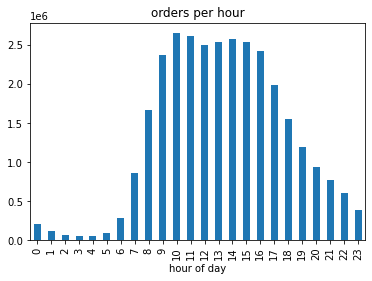

In [73]:
bar_hours_day = df_final_2['order_time_of_day'].value_counts().sort_index().plot.bar()
plt.title('orders per hour')
plt.xlabel('hour of day')

In [89]:
# export bar graph

bar_hours_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_hours_day.png'))

Text(0.5, 0, 'hour of day')

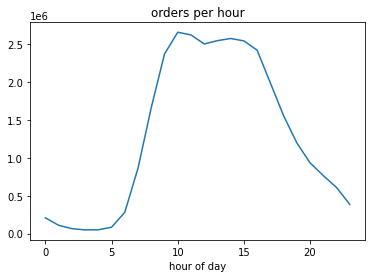

In [74]:
line_hours_day = df_final_2['order_time_of_day'].value_counts().sort_index().plot.line()
plt.title('orders per hour')
plt.xlabel('hour of day')

In [90]:
# export line graph

line_hours_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hours_day.png'))

### Types of products and when they sell graph

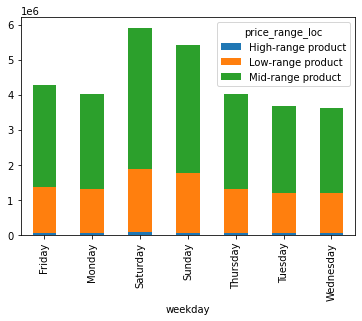

In [75]:
cross_day_price_graph = cross_day_price.plot(kind='bar', stacked=True)

In [92]:
# export bar graph

cross_day_price_graph.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cross_day_price.png'))

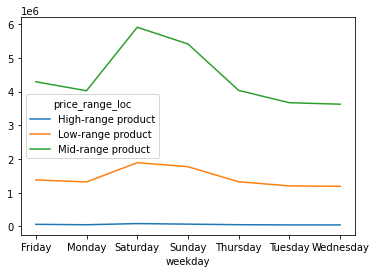

In [76]:
cross_day_price_line_graph = cross_day_price.plot(kind='line', stacked=True)

In [93]:
# export line graph

cross_day_price_line_graph.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cross_day_price_line.png'))

### Types of products graph

Text(0.5, 1.0, 'Types of Products')

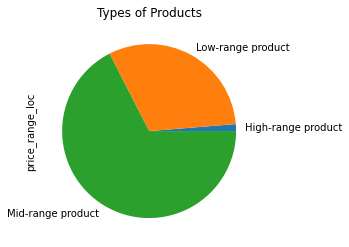

In [77]:
pie_price_ranges = df_final_2['price_range_loc'].value_counts().sort_index().plot.pie()
plt.title('Types of Products')

In [94]:
# export pie chart

pie_price_ranges.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_price_ranges.png'))

### Products comparison

Text(0.5, 0, 'Product')

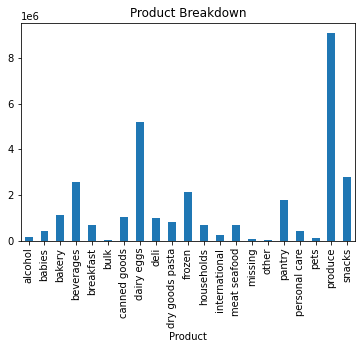

In [78]:
bar_products = df_final_2['department'].value_counts().sort_index().plot.bar()
plt.title('Product Breakdown')
plt.xlabel('Product')

In [95]:
# export bar graph

bar_products.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_products.png'))

### Loyalty breakdown

Text(0.5, 1.0, 'Types of Customers')

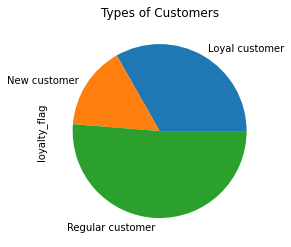

In [79]:
pie_loyalty = df_final_2['loyalty_flag'].value_counts().sort_index().plot.pie()
plt.title('Types of Customers')

In [96]:
# export pie chart

pie_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_loyalty.png'))

### Loyal customer habits graph

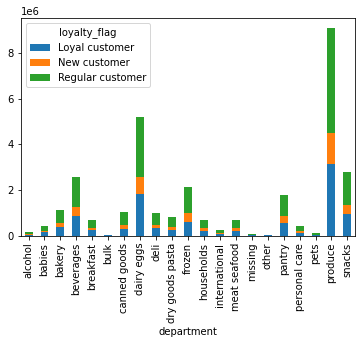

In [80]:
bar_cross_dep_loy = cross_dep_loy.plot(kind='bar', stacked=True)

In [97]:
# export bar graph

bar_cross_dep_loy.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_loy.png'))

### Ordering habits by region

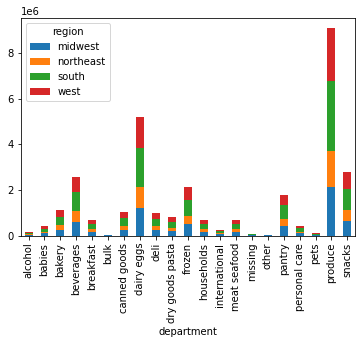

In [81]:
bar_cross_dep_reg = cross_dep_reg.plot(kind='bar', stacked=True)

In [98]:
# export bar graph

bar_cross_dep_reg.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_reg.png'))

### Habits by age range graph

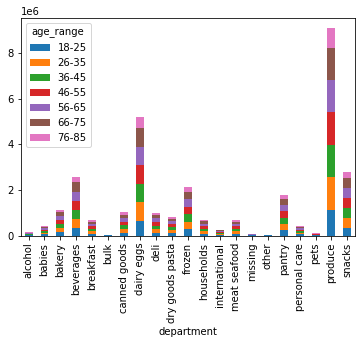

In [82]:
bar_cross_dep_age = cross_dep_age.plot(kind='bar', stacked=True)

In [101]:
# export graph

bar_cross_dep_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cross_dep_age.png'))

### Family status and department habits

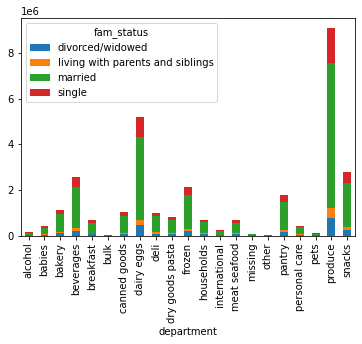

In [83]:
bar_cross_dep_fam = cross_dep_fam.plot(kind='bar', stacked=True)

In [102]:
# export bar graph

bar_cross_dep_fam.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cross_dep_fam.png'))

### Ordering habits of different customer profiles

In [111]:
cross_dep_inc = pd.crosstab(df_final_2['department'], df_final_2['income_range'], dropna = False)

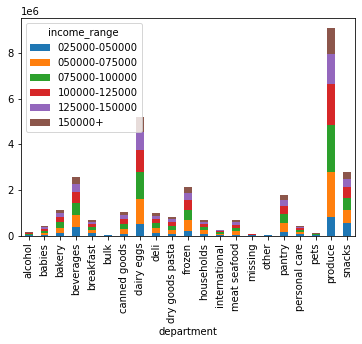

In [112]:
bar_cross_dep_inc = cross_dep_inc.plot(kind='bar', stacked=True)

In [113]:
# export bar graph

bar_cross_dep_inc.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cross_dep_inc.png'))

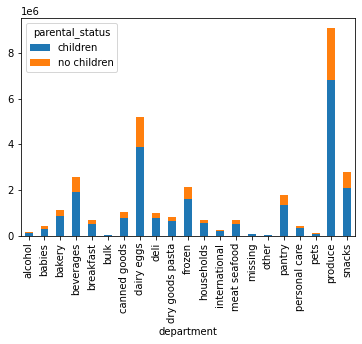

In [117]:
cross_par_dep_graph = cross_par_dep.T.plot(kind='bar', stacked=True)

Text(0.5, 1.0, 'Children or No Children')

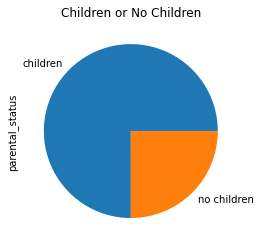

In [131]:
# pie chart of the same data

pie_children = df_final_2['parental_status'].value_counts().sort_index().plot.pie()
plt.title('Children or No Children')

## Step 7 - Descriptive stats

In [84]:
df_final_2.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_time_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                   float64
department_id              float64
prices                     float64
_merge                    category
price_range_loc             object
Busiest days                object
Slowest days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
spending                   float64
type_of_spender             object
order_freq                 float64
frequency_flag              object
gender                      object
state                       object
age                          int64
date_joined                 object
n_dependants        

In [87]:
df_final_2.groupby('income_range').agg({'prices': ['mean', 'min', 'max']})

prices              
                    mean  min      max
income_range                          
025000-050000   6.707347  1.0     25.0
050000-075000   7.833402  1.0  14900.0
075000-100000   9.024778  1.0  99999.0
100000-125000   9.854741  1.0  99999.0
125000-150000  11.042217  1.0  99999.0
150000+        32.620075  1.0  99999.0

In [86]:
df_final_2.groupby('age_range').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
age_range                         
18-25      12.209359  1.0  99999.0
26-35      11.985170  1.0  99999.0
36-45      12.251084  1.0  99999.0
46-55      11.351907  1.0  99999.0
56-65      12.102550  1.0  99999.0
66-75      11.689104  1.0  99999.0
76-85      12.057960  1.0  99999.0

In [88]:
df_final_2.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
midwest    12.681835  1.0  99999.0
northeast  11.542582  1.0  99999.0
south      12.118843  1.0  99999.0
west       11.276491  1.0  99999.0

## Export DF one final time

In [132]:
df_final_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_final_2.pkl'))